# Preprocessing & Training

### Goal:
<p>Create a cleaned development dataset you can use to complete the modeling step of your project.</p>

### Steps:
<ul><li>Create dummy or indicator features for categorical variables</li><li>Standardize the magnitude of numeric features using a scaler</li><li>Split into testing and training datasets</li></ul>
Review the following questions and apply them to your dataset:<ul><li>Does my data set have any categorical data, such as Gender or day of the week?</li><li>Do my features have data values that range from 0 - 100 or 0-1 or both and more?  </li></ul>

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

from library.sb_utils import save_file

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
adopted = pd.read_csv('data/dogs_trimmed.csv')
adopted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7179 entries, 0 to 7178
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration_as_adoptable  7179 non-null   float64
 1   age                    7179 non-null   object 
 2   breed_mixed            7179 non-null   bool   
 3   breed_primary          7179 non-null   object 
 4   city                   7179 non-null   object 
 5   coat                   7179 non-null   object 
 6   color_primary          7179 non-null   object 
 7   distance               7179 non-null   float64
 8   gender                 7179 non-null   object 
 9   goodwith_cats          7179 non-null   object 
 10  goodwith_children      7179 non-null   object 
 11  goodwith_dogs          7179 non-null   object 
 12  hasimage               7179 non-null   bool   
 13  hasvideo               7179 non-null   bool   
 14  house_trained          7179 non-null   bool   
 15  popu

## Dummies!
### After converting bools to ints, of course

In [4]:
df = adopted[['age', 'gender', 'size', 'coat', 'distance', 'spayed_neutered', 'house_trained', 'special_needs', 'shots_current', 'breed_primary', 'breed_mixed', 'color_primary', 'goodwith_children', 'goodwith_dogs', 'goodwith_cats', 'hasimage', 'hasvideo', 'duration_as_adoptable', 'city', 'population']]
df.loc[:, ['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'breed_mixed', 'special_needs', 'shots_current']] = adopted.loc[:, ['hasimage', 'hasvideo', 'spayed_neutered', 'house_trained', 'breed_mixed', 'special_needs', 'shots_current']].astype('int64')
df = pd.get_dummies(df)

In [5]:
# drop one aof each of the dummy category columns so those features don't double-weight anything
df.drop(['age_Senior', 'gender_Female', 'size_Extra Large', 'coat_Hairless', 'breed_primary_Affenpinscher', 'color_primary_Harlequin', 'goodwith_children_False', 'goodwith_dogs_False', 'goodwith_cats_False', 'city_Bonney Lake'], axis=1, inplace=True)

## Imputing Values

In [6]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed = imp.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

## Scaling using StandardScaler()

In [7]:
X = df.drop(columns='duration_as_adoptable')
y = df.duration_as_adoptable

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [8]:
scaled_X = pd.DataFrame(scaled, columns=X.columns)
scaled_X.describe()

,distance,spayed_neutered,house_trained,special_needs,shots_current,breed_mixed,hasimage,hasvideo,population,age_Adult,age_Baby,age_Young,gender_Male,size_Large,size_Medium,size_Small,coat_Curly,coat_Long,coat_Medium,coat_Short,coat_Wire,coat_unknown,breed_primary_Airedale Terrier,breed_primary_Akita,breed_primary_Alaskan Malamute,breed_primary_American Bulldog,breed_primary_American Bully,breed_primary_American Eskimo Dog,breed_primary_American Staffordshire Terrier,breed_primary_Anatolian Shepherd,breed_primary_Australian Cattle Dog / Blue Heeler,breed_primary_Australian Kelpie,breed_primary_Australian Shepherd,breed_primary_Basenji,breed_primary_Basset Hound,breed_primary_Beagle,breed_primary_Bearded Collie,breed_primary_Belgian Shepherd / Laekenois,breed_primary_Belgian Shepherd / Malinois,breed_primary_Belgian Shepherd / Sheepdog,breed_primary_Belgian Shepherd / Tervuren,breed_primary_Bernese Mountain Dog,breed_primary_Bichon Frise,breed_primary_Black Labrador Retriever,breed_primary_Black Mouth Cur,breed_primary_Black and Tan Coonhound,breed_primary_Bloodhound,breed_primary_Bluetick Coonhound,breed_primary_Boerboel,breed_primary_Bolognese,breed_primary_Border Collie,breed_primary_Border Terrier,breed_primary_Boston Terrier,breed_primary_Bouvier des Flandres,breed_primary_Boxer,breed_primary_Brittany Spaniel,breed_primary_Brussels Griffon,breed_primary_Bull Terrier,breed_primary_Bullmastiff,breed_primary_Cairn Terrier,breed_primary_Canaan Dog,breed_primary_Cane Corso,breed_primary_Carolina Dog,breed_primary_Catahoula Leopard Dog,breed_primary_Cattle Dog,breed_primary_Cavalier King Charles Spaniel,breed_primary_Chesapeake Bay Retriever,breed_primary_Chihuahua,breed_primary_Chinese Crested Dog,breed_primary_Chiweenie,breed_primary_Chocolate Labrador Retriever,breed_primary_Chow Chow,breed_primary_Cockapoo,breed_primary_Cocker Spaniel,breed_primary_Collie,breed_primary_Coonhound,breed_primary_Corgi,breed_primary_Coton de Tulear,breed_primary_Dachshund,breed_primary_Dalmatian,breed_primary_Dandie Dinmont Terrier,breed_primary_Doberman Pinscher,breed_primary_Dogo Argentino,breed_primary_Dogue de Bordeaux,breed_primary_Dutch Shepherd,breed_primary_English Bulldog,breed_primary_English Pointer,breed_primary_English Shepherd,breed_primary_English Springer Spaniel,breed_primary_Flat-Coated Retriever,breed_primary_Fox Terrier,breed_primary_French Bulldog,breed_primary_German Pinscher,breed_primary_German Shepherd Dog,breed_primary_German Shorthaired Pointer,breed_primary_German Wirehaired Pointer,breed_primary_Golden Retriever,breed_primary_Great Dane,breed_primary_Great Pyrenees,breed_primary_Greyhound,breed_primary_Havanese,breed_primary_Hound,breed_primary_Husky,breed_primary_Ibizan Hound,breed_primary_Irish Terrier,breed_primary_Irish Wolfhound,breed_primary_Italian Greyhound,breed_primary_Jack Russell Terrier,breed_primary_Japanese Chin,breed_primary_Jindo,breed_primary_Karelian Bear Dog,breed_primary_Labrador Retriever,breed_primary_Leonberger,breed_primary_Lhasa Apso,breed_primary_Maltese,breed_primary_Maltipoo,breed_primary_Manchester Terrier,breed_primary_Mastiff,breed_primary_Miniature Dachshund,breed_primary_Miniature Pinscher,breed_primary_Miniature Poodle,breed_primary_Miniature Schnauzer,breed_primary_Mixed Breed,breed_primary_Mountain Cur,breed_primary_Neapolitan Mastiff,breed_primary_Newfoundland Dog,breed_primary_Norfolk Terrier,breed_primary_Norwich Terrier,breed_primary_Nova Scotia Duck Tolling Retriever,breed_primary_Papillon,breed_primary_Parson Russell Terrier,breed_primary_Patterdale Terrier / Fell Terrier,breed_primary_Pekingese,breed_primary_Pembroke Welsh Corgi,breed_primary_Pharaoh Hound,breed_primary_Pit Bull Terrier,breed_primary_Plott Hound,breed_primary_Pointer,breed_primary_Pomeranian,breed_primary_Poodle,breed_primary_Pug,breed_primary_Pumi,breed_primary_Rat Terrier,breed_primary_Redbone Coonhound,breed_primary_Retriever,breed_primary_Rhodesian Ridgeback,breed_primary_Rottweiler,breed_primary_Rough 

## Split into training and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=192)

In [10]:
X_train.shape, X_test.shape

((5025, 276), (2154, 276))

In [11]:
y_train.shape, y_test.shape

((5025,), (2154,))

In [12]:
# save training and test sets
datapath = 'data/tt_sets'
save_file(X_train, 'dogs_X_train.csv', datapath)
save_file(X_test, 'dogs_X_test.csv', datapath)
save_file(y_train, 'dogs_y_train.csv', datapath)
save_file(y_test, 'dogs_y_test.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/tt_sets/dogs_X_train.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/tt_sets/dogs_X_test.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/tt_sets/dogs_y_train.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data/tt_sets/dogs_y_test.csv"


# Model Selection
### Goal: Build two to three different models and identify the best one.
<ul><li>Fit your models with a training dataset</li>
<li>Review model outcomes — Iterate over additional models as needed</li>
<li>Identify the final model that you think is the best model for this project</li></ul>
 Review the following questions and apply them to your analysis: 
<ul><li>Does my data involve a time series or forecasting? If so, am I splitting the train and test data appropriately?</li>
<li>Is my response variable continuous or categorical?</li></ul>

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [14]:
# function to do random search x times and choose the params of the best one
def random_search_bestof(model, X, y, params, bestof=5):
    scores = {}
    for f in range(1,bestof+1):
        rcv = RandomizedSearchCV(model, param_distributions=params, cv=5, n_jobs=-1)
        rcv.fit(X, y)
        scores[f] = rcv.best_params_
        
    scores_df = pd.DataFrame(scores)
    return scores_df.mode(axis=1)

### RandomForestRegressor

In [15]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.8628632004943086

In [16]:
rf_cv = cross_validate(rf, X_train, y_train, cv=5)
rf_cv_scores_preopt = rf_cv['test_score']
rf_cv_scores_preopt

array([0.13431857, 0.11867011, 0.15905792, 0.21290899, 0.16188173])

In [17]:
np.mean(rf_cv_scores_preopt), np.std(rf_cv_scores_preopt)

(0.15736746231049686, 0.03205256181403246)

In [18]:
rf_pred = rf.predict(X_test)
rmse_rf_preopt = np.sqrt(mean_squared_error(y_test, rf_pred))
print("RMSE : % f" %(rmse_rf_preopt))

RMSE :  40.802252


In [19]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
rf_grid_params = {
        'n_estimators': n_est,
        'max_depth': [1, 2, 3,4,5, 6,7,8,9, 10, None]
}

# import time
# start = time.time()

# #rf_random_cv = RandomizedSearchCV(rf, param_distributions=grid_params, cv=5, n_jobs=-1)
# rf_scores = random_search_bestof(rf, X_train, y_train, rf_grid_params, bestof=20)
# end = time.time()

# print("Time to run 20 Random Searchs:", end - start)

# rf_scores

In [20]:
from sklearn.model_selection import GridSearchCV

gcv = GridSearchCV(rf, param_grid=rf_grid_params, cv=5, n_jobs=-1)
gcv.fit(X_train, y_train)
gcv_params = gcv.best_params_

gcv_params

{'max_depth': 10, 'n_estimators': 143}

In [21]:
rf = RandomForestRegressor(n_estimators=gcv_params['n_estimators'], max_depth=gcv_params['max_depth'])
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.4152011431592625

In [22]:
rf_cv_train = cross_validate(rf, X_train, y_train, cv=5)
rf_cv_test = cross_validate(rf, X_test, y_test, cv=5)
rf_cv_train['test_score'], rf_cv_test['test_score']

(array([0.14334186, 0.14850263, 0.19304454, 0.18514061, 0.16487021]),
 array([0.19378375, 0.20037961, 0.16267619, 0.14225163, 0.11269666]))

In [23]:
rf_train_score = np.mean(rf_cv_train['test_score'])
rf_test_score = np.mean(rf_cv_test['test_score'])

print("Average CV Score, Training Set:", rf_train_score)
print("Average CV Score, Trest Set:", rf_test_score)

Average CV Score, Training Set: 0.1669799719925445
Average CV Score, Trest Set: 0.16235756619969344


In [24]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_test_pred))
print("RMSE Training Set : % f" %(rf_rmse_train))
print("RMSE Test Set : % f" %(rf_rmse_test))

RMSE Training Set :  33.707741
RMSE Test Set :  40.323532


### GradientBoostingRegressor

In [25]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.32444015935814874

In [26]:
gb_cv = cross_validate(gb, X_train, y_train, cv=5)
gb_cv_scores_preopt = gb_cv['test_score']
gb_cv_scores_preopt

array([0.19860265, 0.16299582, 0.23164968, 0.18458344, 0.19977335])

In [27]:
np.mean(gb_cv_scores_preopt), np.std(gb_cv_scores_preopt)

(0.19552098737645146, 0.022407044607674897)

In [28]:
gb_pred = gb.predict(X_test)
rmse_gb_preopt = np.sqrt(mean_squared_error(y_test, gb_pred))
print("RMSE : % f" %(rmse_gb_preopt))

RMSE :  39.806043


In [29]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
gb_grid_params = {
        'learning_rate': [.01, .1, 1],
        'n_estimators': n_est,
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
}

# gb_random_cv = RandomizedSearchCV(gb, param_distributions=grid_params, cv=5, n_jobs=-1)

In [30]:
gb_grid_cv = GridSearchCV(gb, param_grid=gb_grid_params, cv=5, n_jobs=-1)
gb_grid_cv

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69,
                                          88, 112, 143, 183, 233, 297, 379, 483,
                                          615, 784, 1000]})

In [31]:
np.all(np.isfinite(X_train)), np.all(np.isfinite(y_train))

(True, True)

In [32]:
gb_grid_cv.fit(X_train, y_train)
gb_grid_cv_params = gb_grid_cv.best_params_

gb_grid_cv_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 233}

In [33]:
gb = GradientBoostingRegressor(n_estimators=gb_grid_cv_params['n_estimators'], max_depth=gb_grid_cv_params['max_depth'], learning_rate=gb_grid_cv_params['learning_rate'])
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.4144823282578821

In [34]:
gb_cv_train = cross_validate(gb, X_train, y_train, cv=5)
gb_cv_test = cross_validate(gb, X_test, y_test, cv=5)
gb_cv_train['test_score'], gb_cv_test['test_score']

(array([0.21850724, 0.16090536, 0.2502359 , 0.19600137, 0.21625435]),
 array([0.19857991, 0.20201757, 0.22083038, 0.15771654, 0.11876178]))

In [35]:
gb_train_score = np.mean(gb_cv_train['test_score'])
gb_test_score = np.mean(gb_cv_test['test_score'])

print("Average CV Score, Training Set:", gb_train_score)
print("Average CV Score, Trest Set:", gb_test_score)

Average CV Score, Training Set: 0.2083808439435802
Average CV Score, Trest Set: 0.17958123711680224


In [36]:
gb_train_pred = gb.predict(X_train)
gb_test_pred = gb.predict(X_test)
gb_rmse_train = np.sqrt(mean_squared_error(y_train, gb_train_pred))
gb_rmse_test = np.sqrt(mean_squared_error(y_test, gb_test_pred))
print("RMSE Training Set : % f" %(gb_rmse_train))
print("RMSE Test Set : % f" %(gb_rmse_test))

RMSE Training Set :  33.728450
RMSE Test Set :  39.571189


### KNeighborsRegressor

In [37]:
kn = KNeighborsRegressor(n_neighbors=25, weights='distance')
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.9701055940961919

In [38]:
kn_cv = cross_validate(kn, X_train, y_train, cv=5)
kn_cv_scores_preopt = kn_cv['test_score']
np.mean(kn_cv_scores_preopt), np.std(kn_cv_scores_preopt)

(0.13000643944991191, 0.02342259315677363)

In [39]:
kn_pred = kn.predict(X_test)
rmse_kn_preopt = np.sqrt(mean_squared_error(y_test, kn_pred))
print("RMSE : % f" %(rmse_kn_preopt))

RMSE :  41.508912


In [40]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
kn_grid_params = {
        'weights': ['uniform', 'distance'],
        'n_neighbors': n_est,
        'p': [1, 2]
}

# kn_random_cv = RandomizedSearchCV(kn, param_distributions=grid_params, cv=5, n_jobs=-1)

In [41]:
kn_grid_cv = GridSearchCV(kn, param_grid=kn_grid_params, cv=5, n_jobs=-1)
kn_grid_cv.fit(X_train, y_train)
kn_grid_cv_params = kn_grid_cv.best_params_

kn_grid_cv_params

{'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}

In [42]:
kn = KNeighborsRegressor(n_neighbors=kn_grid_cv_params['n_neighbors'], weights=kn_grid_cv_params['weights'], p=kn_grid_cv_params['p'])
kn.fit(X_train, y_train)
kn.score(X_train, y_train)

0.3116790395691934

In [43]:
kn_cv_train = cross_validate(kn, X_train, y_train, cv=5)
kn_cv_test = cross_validate(kn, X_test, y_test, cv=5)
kn_cv_train['test_score'], kn_cv_test['test_score']

(array([0.15977772, 0.14517912, 0.20848528, 0.15738323, 0.19612508]),
 array([0.13310009, 0.13542799, 0.17496173, 0.06337191, 0.16916845]))

In [44]:
kn_train_score = np.mean(kn_cv_train['test_score'])
kn_test_score = np.mean(kn_cv_test['test_score'])

print("Average CV Score, Training Set:", kn_train_score)
print("Average CV Score, Trest Set:", kn_test_score)

Average CV Score, Training Set: 0.17339008516746085
Average CV Score, Trest Set: 0.13520603471272175


In [45]:
kn_train_pred = kn.predict(X_train)
kn_test_pred = kn.predict(X_test)
kn_rmse_train = np.sqrt(mean_squared_error(y_train, kn_train_pred))
kn_rmse_test = np.sqrt(mean_squared_error(y_test, kn_test_pred))
print("RMSE Training Set : % f" %(kn_rmse_train))
print("RMSE Test Set : % f" %(kn_rmse_test))

RMSE Training Set :  36.569741
RMSE Test Set :  39.776351


### XGBoost

In [46]:
xg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 50)
xg.fit(X_train, y_train)
xg.score(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.5777773188465709

In [47]:
xg_cv = cross_validate(xg, X_train, y_train, cv=5)
xg_cv_scores_preopt = xg_cv['test_score']
np.mean(xg_cv_scores_preopt), np.std(xg_cv_scores_preopt)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndar

(0.18742439964704274, 0.02649281642442202)

In [48]:
xg_pred = xg.predict(X_test)
rmse_xg_preopt = np.sqrt(mean_squared_error(y_test, xg_pred))
print("RMSE : % f" %(rmse_xg_preopt))

RMSE :  39.418387


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [49]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
xg_grid_params = {
        'objective': ['reg:squarederror', 'reg:squaredlogerror', 'reg:logistic'],
        'n_estimators': n_est,
}

# xg_random_cv = RandomizedSearchCV(xg, param_distributions=grid_params, cv=5, n_jobs=-1)

In [50]:
xg_grid_cv = GridSearchCV(xg, param_grid=xg_grid_params, cv=5, n_jobs=-1)
xg_grid_cv.fit(X_train, y_train)
xg_grid_cv_params = xg_grid_cv.best_params_

xg_grid_cv_params

{'n_estimators': 26, 'objective': 'reg:squarederror'}

In [51]:
xg = xgb.XGBRegressor(objective=xg_grid_cv_params['objective'], n_estimators = xg_grid_cv_params['n_estimators'])
xg.fit(X_train, y_train)
xg.score(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.4887084462095729

In [52]:
xg_cv_train = cross_validate(xg, X_train, y_train, cv=5)
xg_cv_test = cross_validate(xg, X_test, y_test, cv=5)
xg_cv_train['test_score'], xg_cv_test['test_score']

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndar

(array([0.18520463, 0.16614768, 0.2546173 , 0.19716308, 0.21543938]),
 array([0.20333982, 0.20693267, 0.15080437, 0.14947106, 0.15619605]))

In [53]:
xg_train_score = np.mean(xg_cv_train['test_score'])
xg_test_score = np.mean(xg_cv_test['test_score'])

print("Average CV Score, Training Set:", xg_train_score)
print("Average CV Score, Trest Set:", xg_test_score)

Average CV Score, Training Set: 0.20371441528770218
Average CV Score, Trest Set: 0.1733487938345996


In [54]:
xg_train_pred = xg.predict(X_train)
xg_test_pred = xg.predict(X_test)
xg_rmse_train = np.sqrt(mean_squared_error(y_train, xg_train_pred))
xg_rmse_test = np.sqrt(mean_squared_error(y_test, xg_test_pred))
print("RMSE Training Set : % f" %(xg_rmse_train))
print("RMSE Test Set : % f" %(xg_rmse_test))

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


RMSE Training Set :  31.518148
RMSE Test Set :  39.428796


### Model Comparisons

In [55]:
model_scores = pd.DataFrame({'CV Train': [np.mean(rf_train_score), np.mean(gb_train_score), np.mean(kn_train_score), np.mean(xg_train_score)], 'RMSE Train': [rf_rmse_train, gb_rmse_train, kn_rmse_train, xg_rmse_train],'CV Test': [np.mean(rf_test_score), np.mean(gb_test_score), np.mean(kn_test_score), np.mean(xg_test_score)], 'RMSE Test': [rf_rmse_test, gb_rmse_test, kn_rmse_test, xg_rmse_test]}, index=['RandomForest', 'GradientBoosting', 'KNNeighbors', 'XGBoost'])
model_scores

,CV Train,RMSE Train,CV Test,RMSE Test
RandomForest,0.16698,33.70774,0.16236,40.32353
GradientBoosting,0.20838,33.72845,0.17958,39.57119
KNNeighbors,0.17339,36.56974,0.13521,39.77635
XGBoost,0.20371,31.51815,0.17335,39.42880


In [56]:
print("Model with best CV Score: \nTrain:", model_scores['CV Train'].idxmin(), "\nTest:", model_scores['CV Test'].idxmin())
print("\nModel with best RMSE: \nTrain:", model_scores['RMSE Train'].idxmin(), "\nTest:", model_scores['RMSE Test'].idxmin())

Model with best CV Score: 
Train: RandomForest 
Test: KNNeighbors

Model with best RMSE: 
Train: XGBoost 
Test: XGBoost


In [57]:
models = ['RandomForest', 'GradientBoosting', 'KNNeighbors', 'XGBoost','RandomForest', 'GradientBoosting', 'KNNeighbors', 'XGBoost']
cv_scores_all = [np.mean(rf_train_score), np.mean(gb_train_score), np.mean(kn_train_score), np.mean(xg_train_score), np.mean(rf_test_score), np.mean(gb_test_score), np.mean(kn_test_score), np.mean(xg_test_score)]
types = ['train', 'train', 'train', 'train', 'test', 'test', 'test', 'test']
rmse_scores_all = [rf_rmse_train, gb_rmse_train, kn_rmse_train, xg_rmse_train, rf_rmse_test, gb_rmse_test, kn_rmse_test, xg_rmse_test]

cv_scores = pd.DataFrame(list(zip(models, cv_scores_all, types)), 
               columns =['Model', 'Scores', 'Type' ]) 
rmse_scores = pd.DataFrame(list(zip(models, rmse_scores_all, types)), 
               columns =['Model', 'Scores', 'Type' ]) 

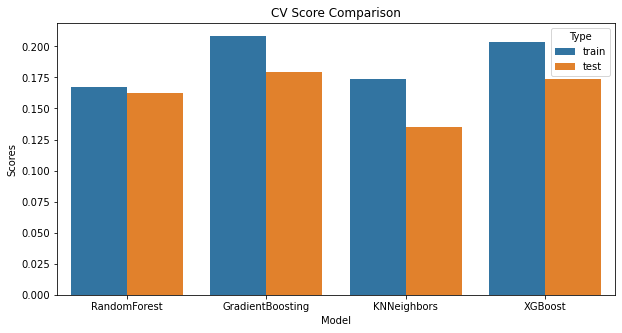

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.subplots(figsize=(10, 5))
sns.barplot(x='Model', y='Scores', hue='Type', data=cv_scores)
plt.title("CV Score Comparison")
plt.show()

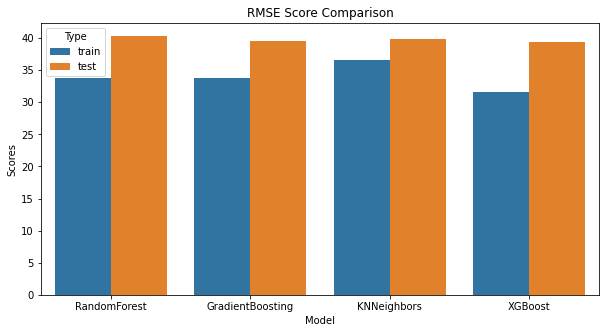

In [59]:
fig=plt.subplots(figsize=(10, 5))
sns.barplot(x='Model', y='Scores', hue='Type', data=rmse_scores)
plt.title("RMSE Score Comparison")
plt.show()

## Conclusion

I'm going to go forward with **GradientBoosting** for the dogs data. I'm choosing this model because it has the best RMSE score for the test set.

In [60]:
std_test = np.std(y_test)
std_test

44.41071724191422

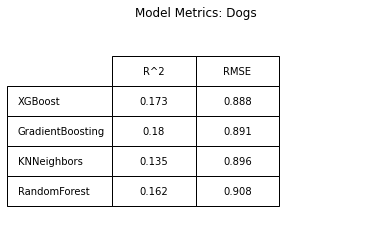

In [61]:
model_scores_test = model_scores.drop(columns=['CV Train','RMSE Train']).rename(columns={'CV Test':'R^2', 'RMSE Test':'RMSE'})

#standardize the RMSE by dividing it by the standard deviation of y_test
model_scores_test['RMSE'] = model_scores_test['RMSE']/std_test

#sort scores by lowest RMSE
model_scores_test.sort_values(by='RMSE', inplace=True)

fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')

table = ax.table(
    cellText=np.round(model_scores_test.values,3), 
    colLabels=model_scores_test.columns, 
    rowLabels=model_scores_test.index, 
    loc='center', 
    cellLoc='center'
)

table.scale(.5, 2.5)

plt.title('Model Metrics: Dogs')

plt.show()

fig.savefig('assets/dogs_model_metrics.png', bbox_inches="tight")
